In [1]:
import pandas as pd

df = pd.read_csv('datas.csv')

In [2]:
df.head()

,Open,High,Low,Close,Volume,NumTrades,MFI,NextDayClose,Target
0,4564.52,4647.51,4416.01,4555.14,808.468771,5551,54.406803,4724.89,2
1,4555.14,4745.42,4555.14,4724.89,556.956802,4161,57.451006,4834.91,2
2,4689.89,4885.55,4654.88,4834.91,560.666366,4000,68.335974,4472.14,0
3,4796.16,4939.19,4286.87,4472.14,929.148595,7475,63.663045,4509.08,1
4,4508.50,4714.76,4298.33,4509.08,691.216198,6022,57.060915,4100.11,0


In [3]:
df.tail()

,Open,High,Low,Close,Volume,NumTrades,MFI,NextDayClose,Target
2336,39897.59,40555.00,39484.19,40084.88,39293.82861,1675615,37.347732,39961.09,1
2337,40084.89,40300.24,39550.00,39961.09,31022.11853,1291233,24.633274,41823.51,2
2338,39961.09,42246.82,39822.52,41823.51,47384.96726,1624861,35.512834,42120.63,1
2339,41823.51,42200.00,41394.34,42120.63,16224.41667,751148,40.171035,42031.06,1
2340,42120.63,42842.68,41620.81,42031.06,27294.99838,1032493,45.682606,42260.82,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2341 non-null   float64
 1   High          2341 non-null   float64
 2   Low           2341 non-null   float64
 3   Close         2341 non-null   float64
 4   Volume        2341 non-null   float64
 5   NumTrades     2341 non-null   int64  
 6   MFI           2341 non-null   float64
 7   NextDayClose  2341 non-null   float64
 8   Target        2341 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 164.7 KB


In [5]:
null=df.isnull()
null.sum()

Open            0
High            0
Low             0
Close           0
Volume          0
NumTrades       0
MFI             0
NextDayClose    0
Target          0
dtype: int64

In [6]:
df.describe()

,Open,High,Low,Close,Volume,NumTrades,MFI,NextDayClose,Target
count,2341.00000,2341.000000,2341.000000,2341.000000,2341.000000,2.341000e+03,2341.000000,2341.000000,2341.000000
mean,21249.90334,21796.871307,20644.862930,21265.849402,73241.511744,1.445743e+06,51.754411,21281.956057,1.056386
std,15995.05365,16407.377360,15527.918637,15997.352898,84202.485418,1.983895e+06,17.422188,15999.502330,0.650627
min,3188.01000,3276.500000,2817.000000,3189.020000,297.597500,3.070000e+03,3.465104,3189.020000,0.000000
25%,8038.82000,8246.540000,7788.990000,8041.460000,30093.091944,3.056030e+05,39.389737,8043.820000,1.000000
50%,16428.77000,16701.990000,15864.000000,16438.880000,46268.790106,7.942920e+05,51.479637,16442.530000,1.000000
75%,31520.07000,32591.350000,30226.170000,31584.450000,77574.952573,1.572299e+06,63.181073,31608.930000,1.000000
max,67525.82000,69000.000000,66222.400000,67525.830000,760705.362783,1.522359e+07,100.000000,67525.830000,2.000000


In [7]:
X = df.drop('Target', axis = 1)
X.head()

,Open,High,Low,Close,Volume,NumTrades,MFI,NextDayClose
0,4564.52,4647.51,4416.01,4555.14,808.468771,5551,54.406803,4724.89
1,4555.14,4745.42,4555.14,4724.89,556.956802,4161,57.451006,4834.91
2,4689.89,4885.55,4654.88,4834.91,560.666366,4000,68.335974,4472.14
3,4796.16,4939.19,4286.87,4472.14,929.148595,7475,63.663045,4509.08
4,4508.50,4714.76,4298.33,4509.08,691.216198,6022,57.060915,4100.11


In [8]:
Y = df['Target']
Y.head()

0    2
1    2
2    0
3    1
4    0
Name: Target, dtype: int64

In [9]:
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.metrics import classification_report, confusion_matrix

C:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


C:\anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'NumTrades'}>],
       [<AxesSubplot:title={'center':'MFI'}>,
        <AxesSubplot:title={'center':'NextDayClose'}>,
        <AxesSubplot:title={'center':'Target'}>]], dtype=object)

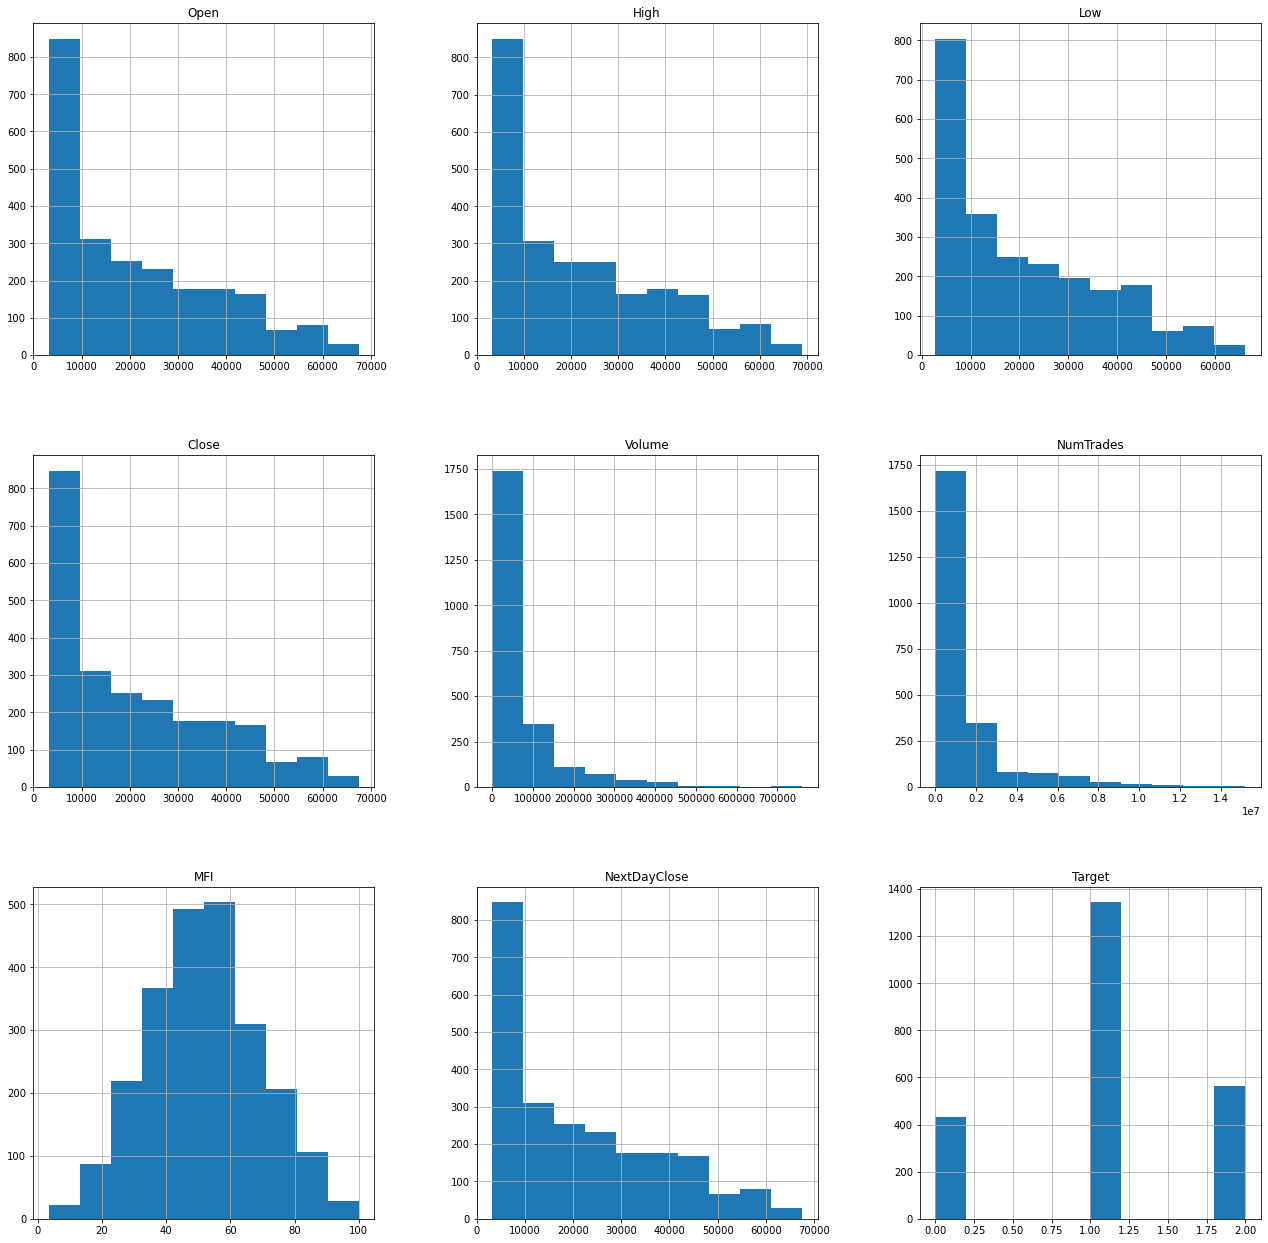

In [10]:
df.hist(figsize = (22,22))

<AxesSubplot:>

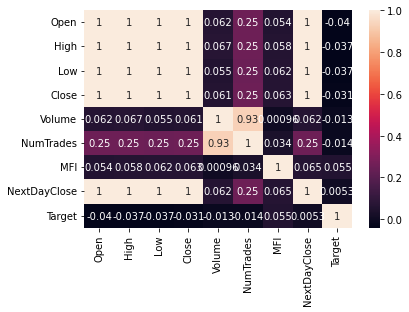

In [11]:
sns.heatmap(df.corr(), annot = True)

In [12]:
transform = preprocessing.StandardScaler()
X= preprocessing.StandardScaler().fit(X).transform(X) 
X[:5]

array([[-1.04338182, -1.0454459 , -1.04536356, -1.04481534, -0.86040831,
        -0.72609695,  0.15227475, -1.03506991],
       [-1.04396838, -1.03947718, -1.03640165, -1.03420194, -0.86339594,
        -0.72679774,  0.32704344, -1.02819198],
       [-1.0355421 , -1.03093469, -1.02997701, -1.02732308, -0.86335188,
        -0.72687891,  0.95195307, -1.05087066],
       [-1.02889675, -1.02766473, -1.05368197, -1.05000481, -0.8589748 ,
        -0.72512693,  0.68367866, -1.04856134],
       [-1.0468849 , -1.04134625, -1.05294378, -1.04769518, -0.86180112,
        -0.72585949,  0.3046482 , -1.07412822]])

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=2)

In [14]:
print(Y.shape)
print(X.shape)

(2341,)
(2341, 8)


In [15]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression(max_iter=1000)
grid_search=GridSearchCV(lr,parameters,cv=10)
logreg_cv = grid_search.fit(X_train, Y_train)

In [16]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.6308795084765048


In [17]:
test_score=logreg_cv.score(X_test,Y_test)
train_score=logreg_cv.score(X_train,Y_train)
general_score=logreg_cv.score(X,Y)
print('test_score:', test_score)
print('train_score:', train_score)
print('general_score:', general_score)

test_score: 0.6567164179104478
train_score: 0.6378205128205128
general_score: 0.6416061512174285


# USING SVC

In [18]:
svm_model = SVC(kernel='linear')  # 'linear' kernel is often used for text classification
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [20]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = svm_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

classification_rep = classification_report(Y_test, y_pred)
print("Classification Report:\n", classification_rep)


Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.17      0.29        83
           1       0.63      1.00      0.78       270
           2       1.00      0.26      0.41       116

    accuracy                           0.67       469
   macro avg       0.86      0.47      0.49       469
weighted avg       0.78      0.67      0.60       469



In [22]:
test_score=svm_model.score(X_test,Y_test)
train_score=svm_model.score(X_train,Y_train)
general_score=svm_model.score(X,Y)
print('test_score:', test_score)
print('train_score:', train_score)
print('general_score:', general_score)

test_score: 0.6673773987206824
train_score: 0.6458333333333334
general_score: 0.6501495087569414


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

# Define the hyperparameter grid
param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 10))
}

# Create an SVM model
svm_model = SVC()

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_svm_model = random_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

classification_rep = classification_report(Y_test, y_pred)
print("Classification Report:\n", classification_rep)


In [23]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [5, 10, 15],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, scoring='accuracy',cv = 10)
tree_cv = tree_cv.fit(X_train, Y_train)
Best_DT = tree_cv.best_estimator_
DT_acc_score = Best_DT.score(X_test, Y_test)
print('Accuracy score of the Decision Tree Model with Test data: ', DT_acc_score )

Accuracy score of the Decision Tree Model with Test data:  0.579957356076759


In [24]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 15, 'splitter': 'random'}
accuracy : 0.5758504949368529


In [25]:
test_score=tree_cv.score(X_test,Y_test)
train_score=tree_cv.score(X_train,Y_train)
general_score=tree_cv.score(X,Y)
print('test_score:', test_score)
print('train_score:', train_score)
print('general_score:', general_score)

test_score: 0.579957356076759
train_score: 0.5790598290598291
general_score: 0.5792396411789833


In [26]:
from sklearn import neighbors
## instantiate the model


parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = neighbors.KNeighborsClassifier()

In [27]:
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# define the model
knn = neighbors.KNeighborsClassifier()

# define the grid search object
grid_search_knn = GridSearchCV(
    estimator = knn,
    param_grid = parameters_knn,
    scoring = 'accuracy',
    cv = 10
)
# execute search
knn_cv = grid_search_knn.fit(X_train, Y_train)

In [28]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.5496871088861076


In [29]:
models = {'KNeighbors':knn_cv.best_score_,
              'DecisionTree':tree_cv.best_score_,
              'LogisticRegression':logreg_cv.best_score_, ##'SupportVector': svm_cv.best_score_
              }

bestalgorithm = max(models, key=models.get)
print('Best model is', bestalgorithm,'with a score of', models[bestalgorithm])
if bestalgorithm == 'DecisionTree':
    print('Best params is :', tree_cv.best_params_)
if bestalgorithm == 'KNeighbors':
    print('Best params is :', knn_cv.best_params_)
if bestalgorithm == 'LogisticRegression':
    print('Best params is :', logreg_cv.best_params_)
#if bestalgorithm == 'SupportVector':
    #print('Best params is :', svm_cv.best_params_)

Best model is LogisticRegression with a score of 0.6308795084765048
Best params is : {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [39]:
target_columns = ["Target"]
target = df[target_columns]

# Extracting feature columns
feature_columns = [col for col in df.columns if col not in target_columns]
features = df[feature_columns]

In [41]:
from sklearn import preprocessing
from sklearn.utils import shuffle

# Assuming features is your feature DataFrame
features_std = preprocessing.scale(features)

# Assuming target is your target DataFrame
# Replace 'your_target_column' with the actual name of your target column
shuffled_data = pd.concat([pd.DataFrame(features_std, columns=features.columns), target], axis=1)

# Shuffle the data
shuffled_data = shuffle(shuffled_data, random_state=42)



In [42]:
shuffled_data.head()

,Open,High,Low,Close,Volume,NumTrades,MFI,NextDayClose,Target
1557,1.744822,1.700951,1.744479,1.758822,-0.328572,-0.037260,-1.242867,1.822944,2
679,-0.544121,-0.527302,-0.584612,-0.572559,0.427686,-0.275453,-0.913272,-0.621344,0
237,-0.770147,-0.735550,-0.755115,-0.728142,-0.320400,-0.564231,2.013818,-0.775938,0
2262,1.003758,0.951689,1.032044,0.991885,-0.596981,-0.263399,1.719342,0.986627,1
1726,0.565547,0.540948,0.529578,0.490392,-0.110947,-0.059202,-1.514281,0.523417,1


In [43]:
from sklearn.model_selection import train_test_split

# Assuming shuffled_data is your shuffled DataFrame with standardized features and target
# Replace 'your_target_column' with the actual name of your target column
X = shuffled_data.drop(["Target"], axis=1)  # Features
y = shuffled_data[["Target"]]  # Target

# Split the data into train, validation, and test sets
# Adjust the test_size and validation_size as needed
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [44]:
X.shape

(2341, 8)

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score

# Assuming you have X_train, X_val, y_train, and y_val from the previous split
# Replace 'your_target_column' with the actual name of your target column

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=2)

# Evaluate on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Test Accuracy: {accuracy}')


Epoch 1/100
59/59 - 2s - loss: 0.8430 - accuracy: 0.5748 - val_loss: 0.2821 - val_accuracy: 0.5513 - 2s/epoch - 41ms/step
Epoch 2/100
59/59 - 0s - loss: 0.2007 - accuracy: 0.5748 - val_loss: -3.6157e-01 - val_accuracy: 0.5513 - 267ms/epoch - 5ms/step
Epoch 3/100
59/59 - 0s - loss: -3.5919e-01 - accuracy: 0.5748 - val_loss: -1.2514e+00 - val_accuracy: 0.5513 - 270ms/epoch - 5ms/step
Epoch 4/100
59/59 - 0s - loss: -1.2542e+00 - accuracy: 0.5748 - val_loss: -2.9528e+00 - val_accuracy: 0.5513 - 260ms/epoch - 4ms/step
Epoch 5/100
59/59 - 0s - loss: -2.8037e+00 - accuracy: 0.5748 - val_loss: -5.7993e+00 - val_accuracy: 0.5513 - 265ms/epoch - 4ms/step
Epoch 6/100
59/59 - 0s - loss: -5.6834e+00 - accuracy: 0.5748 - val_loss: -1.0797e+01 - val_accuracy: 0.5513 - 270ms/epoch - 5ms/step
Epoch 7/100
59/59 - 1s - loss: -1.0035e+01 - accuracy: 0.5748 - val_loss: -1.8319e+01 - val_accuracy: 0.5513 - 687ms/epoch - 12ms/step
Epoch 8/100
59/59 - 1s - loss: -1.6962e+01 - accuracy: 0.5748 - val_loss: -2.9

Epoch 62/100
59/59 - 0s - loss: -1.1300e+04 - accuracy: 0.5748 - val_loss: -1.5664e+04 - val_accuracy: 0.5513 - 362ms/epoch - 6ms/step
Epoch 63/100
59/59 - 0s - loss: -1.1795e+04 - accuracy: 0.5748 - val_loss: -1.6282e+04 - val_accuracy: 0.5513 - 256ms/epoch - 4ms/step
Epoch 64/100
59/59 - 0s - loss: -1.2296e+04 - accuracy: 0.5748 - val_loss: -1.6903e+04 - val_accuracy: 0.5513 - 259ms/epoch - 4ms/step
Epoch 65/100
59/59 - 0s - loss: -1.2813e+04 - accuracy: 0.5748 - val_loss: -1.7689e+04 - val_accuracy: 0.5513 - 254ms/epoch - 4ms/step
Epoch 66/100
59/59 - 0s - loss: -1.3345e+04 - accuracy: 0.5748 - val_loss: -1.8402e+04 - val_accuracy: 0.5513 - 266ms/epoch - 5ms/step
Epoch 67/100
59/59 - 0s - loss: -1.3844e+04 - accuracy: 0.5748 - val_loss: -1.9210e+04 - val_accuracy: 0.5513 - 258ms/epoch - 4ms/step
Epoch 68/100
59/59 - 0s - loss: -1.4415e+04 - accuracy: 0.5748 - val_loss: -1.9832e+04 - val_accuracy: 0.5513 - 257ms/epoch - 4ms/step
Epoch 69/100
59/59 - 0s - loss: -1.4962e+04 - accuracy:

In [52]:
from tensorflow.keras.utils import to_categorical

# Assuming you have X_train, X_val, y_train, y_val, X_test, and y_test from the previous split

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# One-Hot Encode the target variable
num_classes = 3  # Adjust based on the number of classes
y_train_one_hot = to_categorical(y_train, num_classes)
y_val_one_hot = to_categorical(y_val, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(num_classes, activation='softmax'))  # Using softmax cause of the multi class

# Compile the model
learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 100
batch_size = 32
history = model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val_one_hot), verbose=2)

# Evaluate on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Test Accuracy: {accuracy}')


Epoch 1/100
59/59 - 103s - loss: 1.7534 - accuracy: 0.5662 - val_loss: 1.5269 - val_accuracy: 0.5513 - 103s/epoch - 2s/step
Epoch 2/100
59/59 - 0s - loss: 1.4021 - accuracy: 0.5748 - val_loss: 1.2861 - val_accuracy: 0.5513 - 274ms/epoch - 5ms/step
Epoch 3/100
59/59 - 0s - loss: 1.2192 - accuracy: 0.5748 - val_loss: 1.1660 - val_accuracy: 0.5513 - 276ms/epoch - 5ms/step
Epoch 4/100
59/59 - 0s - loss: 1.1260 - accuracy: 0.5748 - val_loss: 1.1003 - val_accuracy: 0.5513 - 265ms/epoch - 4ms/step
Epoch 5/100
59/59 - 0s - loss: 1.0689 - accuracy: 0.5748 - val_loss: 1.0598 - val_accuracy: 0.5513 - 265ms/epoch - 4ms/step
Epoch 6/100
59/59 - 0s - loss: 1.0354 - accuracy: 0.5748 - val_loss: 1.0395 - val_accuracy: 0.5513 - 275ms/epoch - 5ms/step
Epoch 7/100
59/59 - 0s - loss: 1.0152 - accuracy: 0.5748 - val_loss: 1.0236 - val_accuracy: 0.5513 - 315ms/epoch - 5ms/step
Epoch 8/100
59/59 - 0s - loss: 1.0039 - accuracy: 0.5748 - val_loss: 1.0121 - val_accuracy: 0.5513 - 267ms/epoch - 5ms/step
Epoch 9/

Epoch 67/100
59/59 - 1s - loss: 0.7500 - accuracy: 0.7238 - val_loss: 0.7508 - val_accuracy: 0.6966 - 805ms/epoch - 14ms/step
Epoch 68/100
59/59 - 0s - loss: 0.7365 - accuracy: 0.7142 - val_loss: 0.7593 - val_accuracy: 0.6966 - 284ms/epoch - 5ms/step
Epoch 69/100
59/59 - 0s - loss: 0.7394 - accuracy: 0.7126 - val_loss: 0.7491 - val_accuracy: 0.6923 - 251ms/epoch - 4ms/step
Epoch 70/100
59/59 - 0s - loss: 0.7282 - accuracy: 0.7233 - val_loss: 0.7514 - val_accuracy: 0.7051 - 249ms/epoch - 4ms/step
Epoch 71/100
59/59 - 0s - loss: 0.7335 - accuracy: 0.7163 - val_loss: 0.7448 - val_accuracy: 0.7094 - 251ms/epoch - 4ms/step
Epoch 72/100
59/59 - 0s - loss: 0.7433 - accuracy: 0.7270 - val_loss: 0.7938 - val_accuracy: 0.6667 - 251ms/epoch - 4ms/step
Epoch 73/100
59/59 - 0s - loss: 0.7325 - accuracy: 0.7190 - val_loss: 0.7560 - val_accuracy: 0.7137 - 251ms/epoch - 4ms/step
Epoch 74/100
59/59 - 0s - loss: 0.7254 - accuracy: 0.7196 - val_loss: 0.7455 - val_accuracy: 0.7265 - 255ms/epoch - 4ms/step